# 概念
## canvas
    画板 用户无法接触的。
## figure
    画布 用户接触的第一层。
## axes
    绘图区 一个画布上可以多个绘图区。
## 辅助显示层
    axes内的除了绘制的图像之外的内容，包括 Axes外观、边框线、坐标轴、坐标轴名称、坐标轴刻度、坐标轴刻度标签、网络线、图例、标题等内容。
## 图像层
    Axes内通过plot、scatter、bar、histogram、pie等函数根据数据绘制出的图像。

# 折线图的绘制
    matplotlib.pyplot包含了一系列的画图函数。它的函数作用于当前图形(figure)的当前坐标系(axes)

## 简单案例

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

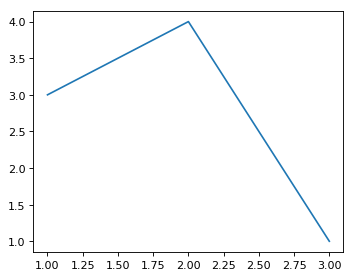

<Figure size 432x288 with 0 Axes>

In [10]:
# 创建画布，并设置画布属性
    # figsize:指定图的长宽
    # dpi:图像的清晰度
    # 返回fig对象
plt.figure(figsize=(5, 4), dpi=80)
# 绘制图像
plt.plot([1,2,3],[3,4,1])
# 显示图像
plt.show()
# 图片保存到指定路径，show()会释放figure资源，如果在显示图像之后保存图片只能保存空图片。
# plt.savefig('1.png')

## 案例：显示温度变化状况
    需求：画出某城市11点到12点这一小时内每分钟的温度变化折线图，温度范围在15°~18°
    需求：再添加一个城市的温度变化，收集到北京当天温度变化情况，温度在1度到3度。 

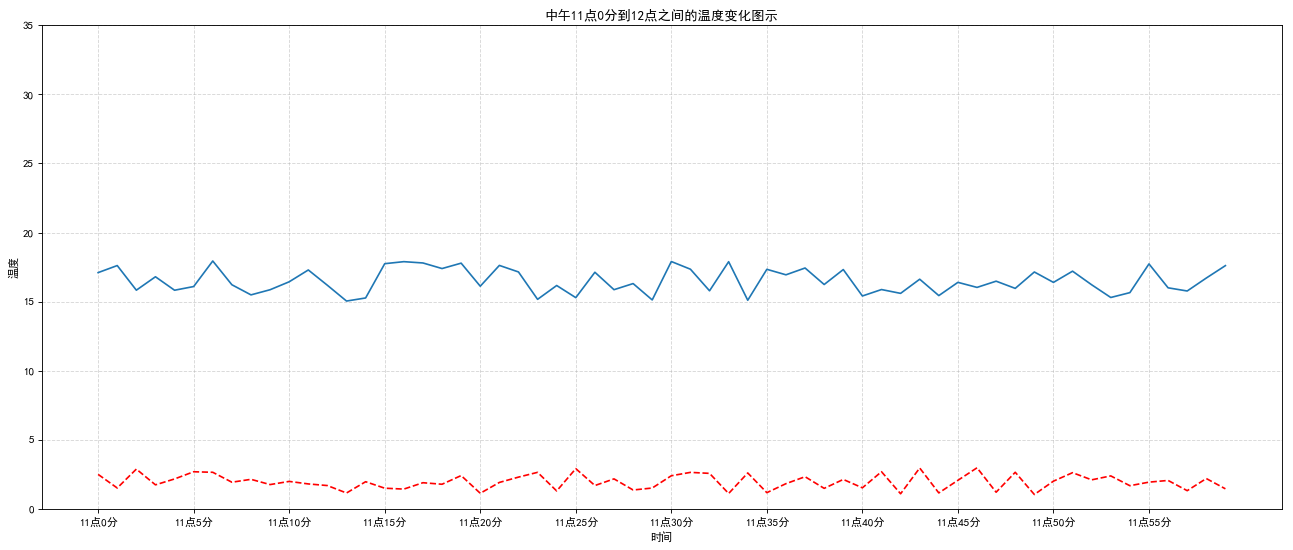

In [29]:

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

import random


# 1）准备x, y坐标的数据。
x = range(60)  # 一小时60分钟
y_shanghai = [random.uniform(15, 18) for i in x]  # 上海的温度数据 ，uniform() 方法将随机生成下一个实数，它在 [x, y) 范围内。
y_beijing = [random.uniform(1, 3) for i in x]  # 北京的温度数据

# 2）添加自定义x,y刻度。
x_ticks_label = ["11点{}分".format(i) for i in x]
y_ticks = range(40)

# 3）创建画布。
plt.figure(figsize=(20, 8), dpi=80)

# 4）绘制折线图。
plt.plot(x, y_shanghai, label="上海")  # 绘制上海数据
plt.plot(x, y_beijing,  color='r', linestyle='--', label="北京")  # 绘制北京数据，设置颜色与折线风格

# 5) 修改x,y轴坐标的刻度显示。第一个参数是刻度的间距，第二个参数是修改默认的刻度名称为什么。
plt.xticks(x[::5], x_ticks_label[::5])
plt.yticks(y_ticks[::5])

# 6）添加网格线，第一个参数：是否显示网格线，第二个参数：网格线的风格，第三个参数：网格线的透明度
plt.grid(True, linestyle='--', alpha=0.5)

# 7) 添加 x,y 轴描述信息，并添加标题
plt.xlabel("时间")
plt.ylabel("温度")
plt.title("中午11点0分到12点之间的温度变化图示")

# 8) 显示图例
plt.legend(loc="best")  # loc：图例位置

# 9）显示图像。
plt.show()

|    颜色字符   |    风格字符                      
|----------------|-------------------------------|
|r 红色|- 实线            |
|g 绿色          |- - 虚线            |
|b 蓝色          |-. 点划线  |
|w 白色          |: 点虚线  |
|c 青色          |' ' 留空、空格  |
|m 洋红          |  |
|y 黄色          |  |
|k 黑色          |  |

## 多个坐标系显示-plt.subplots
    我们想要将上海和北京的天气图显示在同一个图的不同坐标系当中

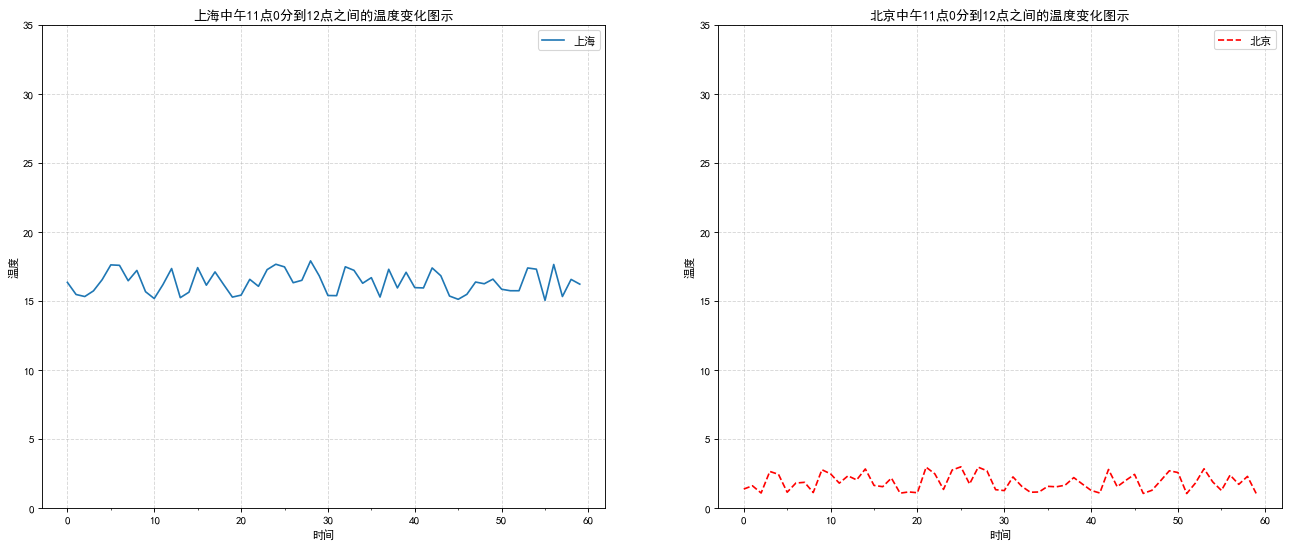

In [31]:
# 1）准备x, y坐标的数据。
x = range(60)  # 一小时60分钟
y_shanghai = [random.uniform(15, 18) for i in x]  # 上海的温度数据
y_beijing = [random.uniform(1, 3) for i in x]  # 北京的温度数据

# 2）添加自定义x,y刻度。
x_ticks_label = ["11点{}分".format(i) for i in x]
y_ticks = range(40)

# 3）创建画布。
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=80)

# 4）绘制折线图。
axes[0].plot(x, y_shanghai, label="上海")
axes[1].plot(x, y_beijing, color='r', linestyle='--', label="北京")

# 5) 修改x,y轴坐标的刻度显示。
axes[0].set_xticks(x[::5], x_ticks_label[::5])
axes[0].set_yticks(y_ticks[::5])
axes[1].set_xticks(x[::5], x_ticks_label[::5])
axes[1].set_yticks(y_ticks[::5])


# 6）添加网格线
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[1].grid(True, linestyle='--', alpha=0.5)

# 7) 添加 x,y 轴描述信息，并添加标题
axes[0].set_xlabel("时间")
axes[0].set_ylabel("温度")
axes[0].set_title("上海中午11点0分到12点之间的温度变化图示")
axes[1].set_xlabel("时间")
axes[1].set_ylabel("温度")
axes[1].set_title("北京中午11点0分到12点之间的温度变化图示")

# 8) 显示图例
axes[0].legend()
axes[1].legend()

# 9）显示图像。
plt.show()

## 应用场景 - 数学函数图像的绘制

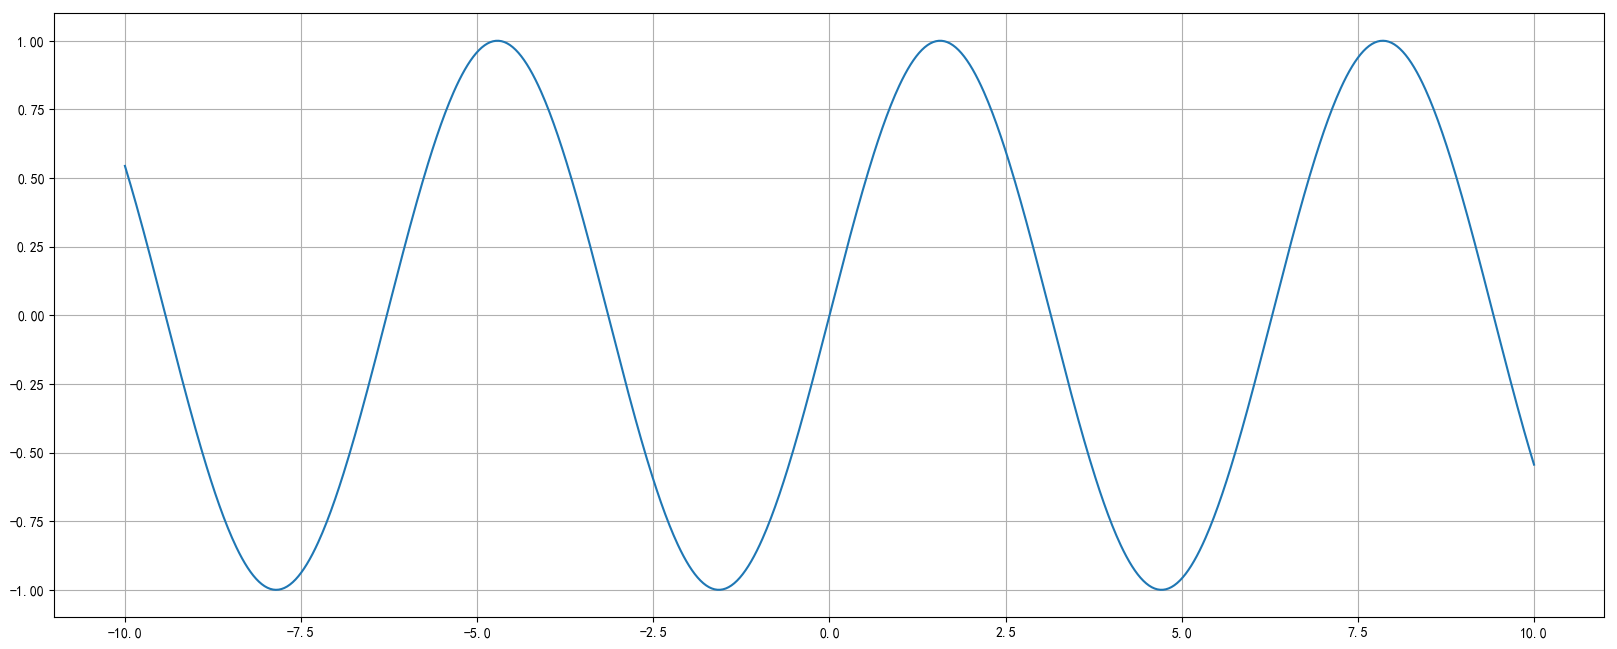

In [32]:
import numpy as np
# 1）准备数据
x = np.linspace(-10, 10, 1000)  # -10到10之间取1000个点
y = np.sin(x)

# 2）创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 3）绘制函数图像
plt.plot(x, y)
plt.grid()  # 添加网格显示

# 4）显示图像
plt.show()

# 小结
+ 如何解决中文显示问题
+ matplotlib的图结构
+ figure实现创建绘图区域大小
+ plot实现折线图的绘制
+ title,xlabel,ylabel实现标题以及x,y轴名设置
+ xticks,yticks实现axes的刻度设置和标注
+ savefig实现图形的本地保存
+ grid实现显示网格应用axis实现图像形状修改
+ legend实现图形标注信息显示
+ plt.subplots实现多坐标系的创建
+ 如何设置多个axes的标题、刻度

## 图形种类及其意义
+ 折线图  变化情况，变化趋势
+ 散点图  判断数据之间是否存在数量关联趋势，展示离群点(分布规律)
+ 柱状图  对离散数据之间数量关系进行统计和对比
+ 直方图  展示连续性变量的统计分布
+ 饼图   分类数据的占比情况

## 散点图(scatter)
    需求：探究房屋面积和房屋价格的关系

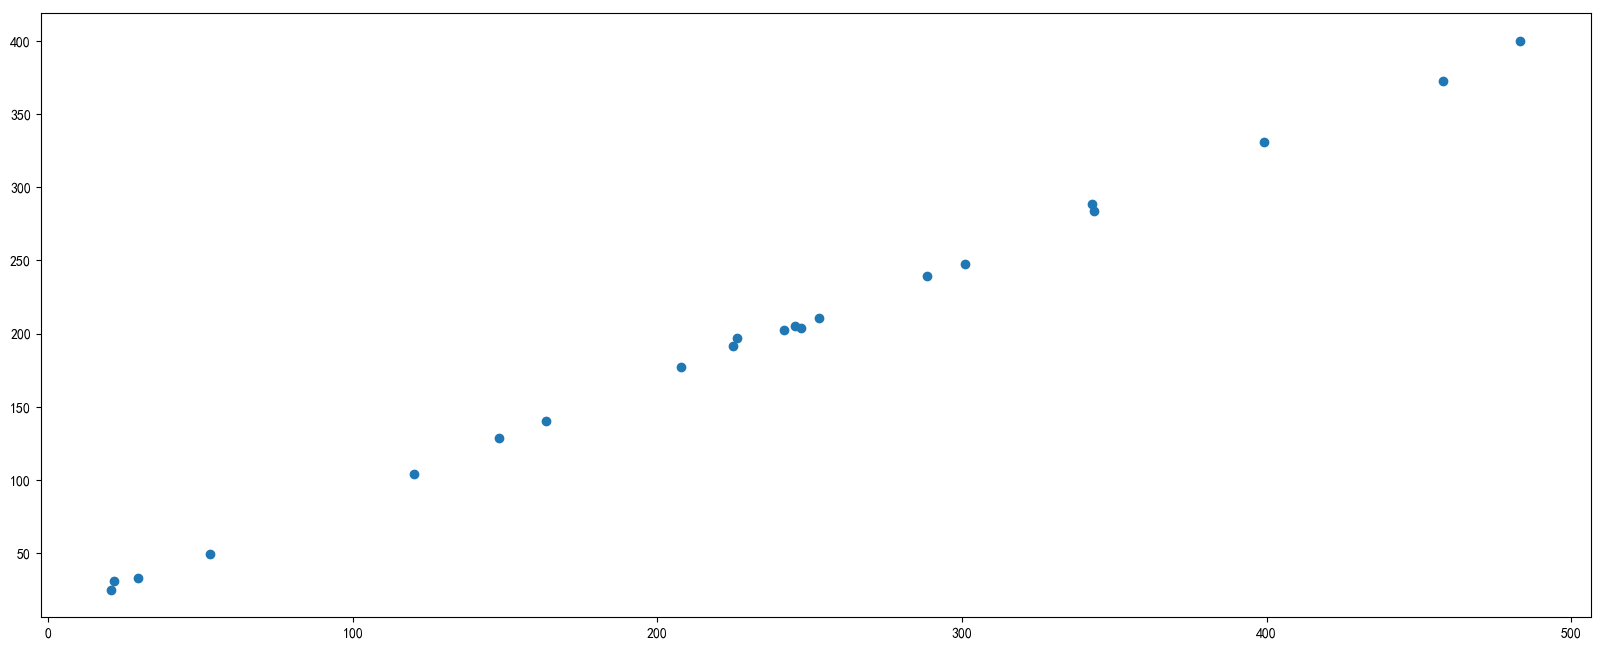

In [33]:
# 1> 房屋面积与房屋价格数据
x = [225.98, 247.07, 253.14, 457.85, 241.58, 301.01,  20.67, 288.64,
       163.56, 120.06, 207.83, 342.75, 147.9 ,  53.06, 224.72,  29.51,
        21.61, 483.21, 245.25, 399.25, 343.35]
y = [196.63, 203.88, 210.75, 372.74, 202.41, 247.61,  24.9 , 239.34,
       140.32, 104.15, 176.84, 288.23, 128.79,  49.64, 191.74,  33.1 ,
        30.74, 400.02, 205.35, 330.64, 283.45]

# 2）创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 3）绘制散点图
plt.scatter(x, y)

# 4）显示图像
plt.show()

## 柱状图
    matplotlib.pyplot.bar(x, width, align='center', **kwargs)
    需求1-对比每部电影的票房收入
    

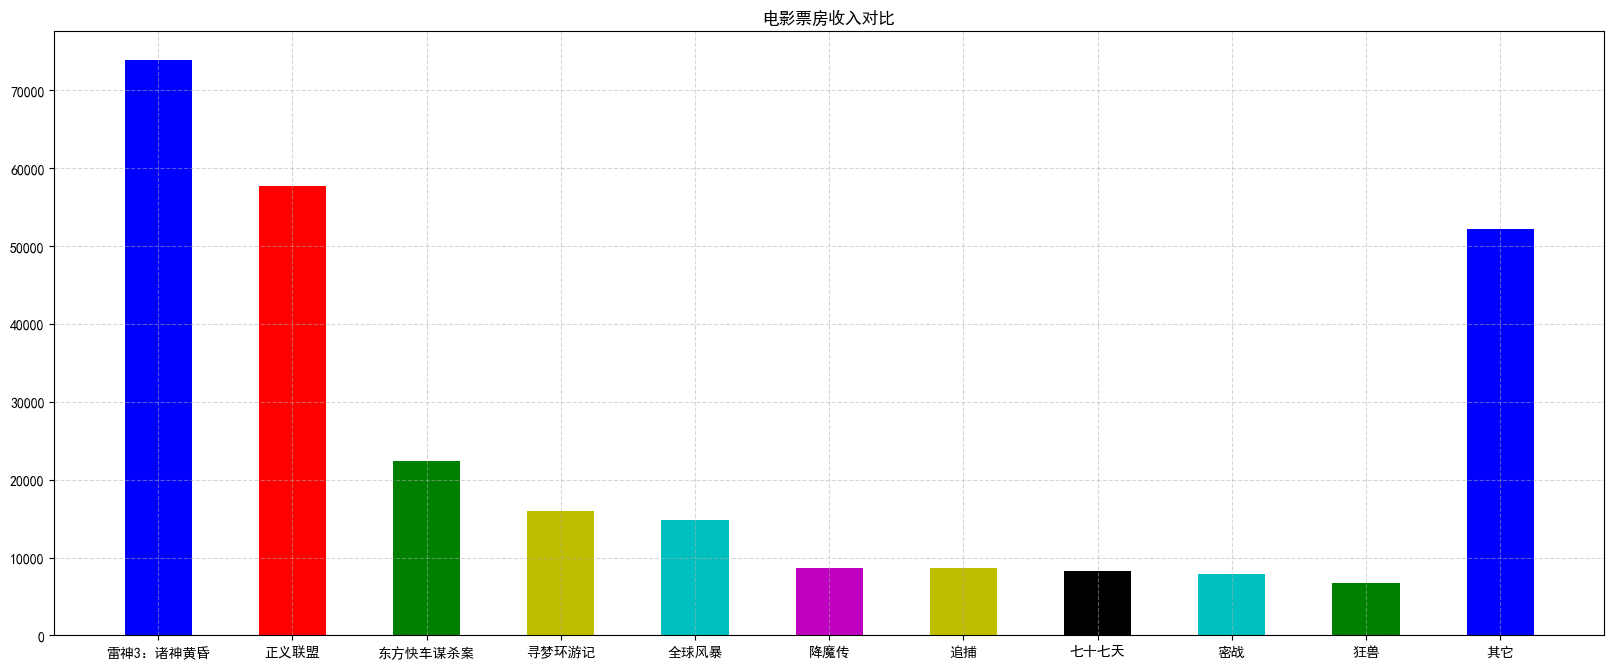

In [35]:
# 1）准备数据
movie_name = ['雷神3：诸神黄昏','正义联盟','东方快车谋杀案','寻梦环游记','全球风暴','降魔传','追捕','七十七天','密战','狂兽','其它']
# 横坐标
x = range(len(movie_name))
# 票房数据
y = [73853,57767,22354,15969,14839,8725,8716,8318,7916,6764,52222]

# 2）创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 3）绘制柱状图
plt.bar(x, y, width=0.5, color=['b','r','g','y','c','m','y','k','c','g','b'])

# 4）修改x轴的刻度显示
plt.xticks(x, movie_name)

# 5）添加网格显示
plt.grid(linestyle="--", alpha=0.5)

# 6）添加标题
plt.title("电影票房收入对比")

# 7）显示图像
plt.show()

## 需求2-如何对比电影票房收入才更能加有说服力？
    有时候为了公平起见，我们需要对比不同电影首日和首周的票房

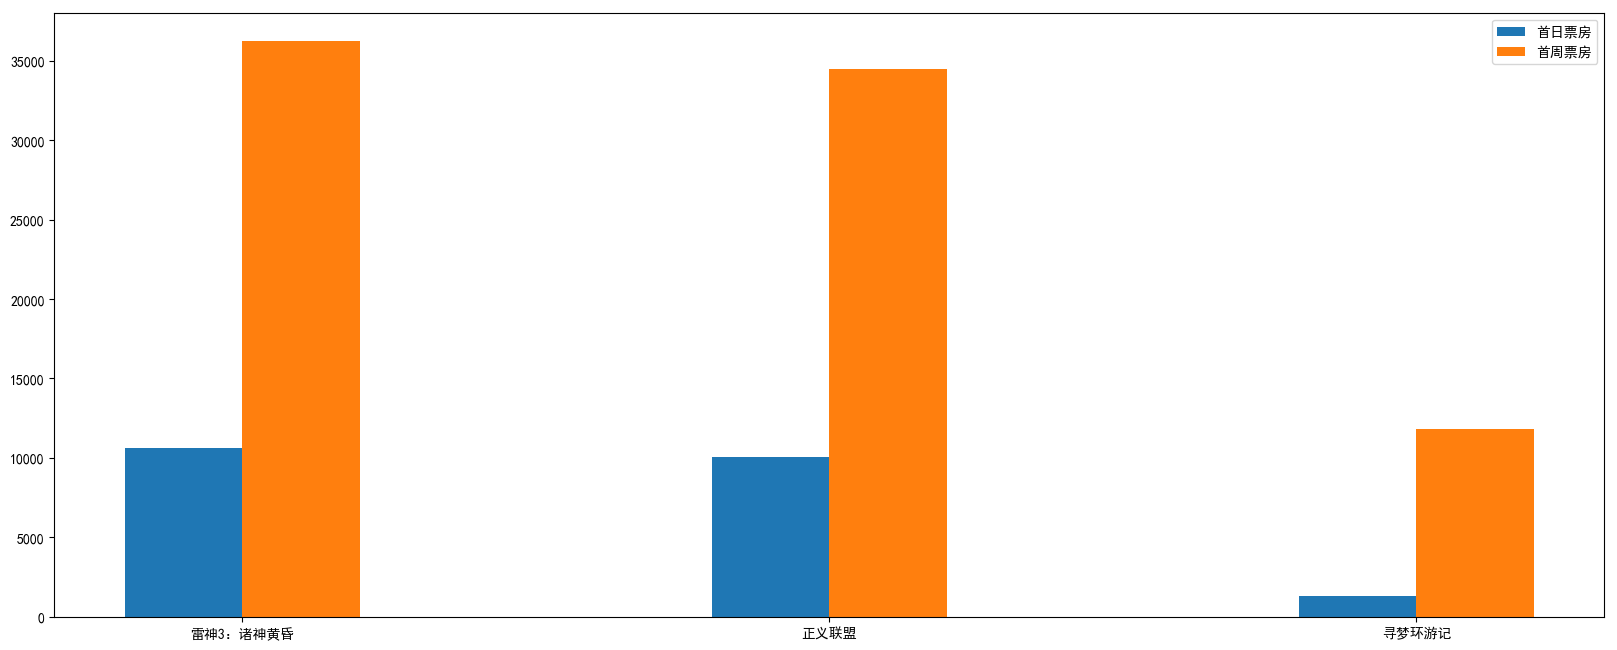

In [36]:
# 1）准备数据
movie_name = ['雷神3：诸神黄昏','正义联盟','寻梦环游记']

first_day = [10587.6,10062.5,1275.7]
first_weekend=[36224.9,34479.6,11830]

x = range(len(movie_name))

# 2）创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 3）绘制柱状图
plt.bar(x, first_day, width=0.2, label="首日票房")
plt.bar([i+0.2 for i in x], first_weekend, width=0.2, label="首周票房")

# 显示图例
plt.legend()

# 修改x轴刻度显示
plt.xticks([i+0.1 for i in x], movie_name)

# 4）显示图像
plt.show()

## 直方图
    matplotlib.pyplot.hist(x, bins=None, normed=None, **kwargs)
    对连续变量研究统计分布
    需求：电影时长分布状况

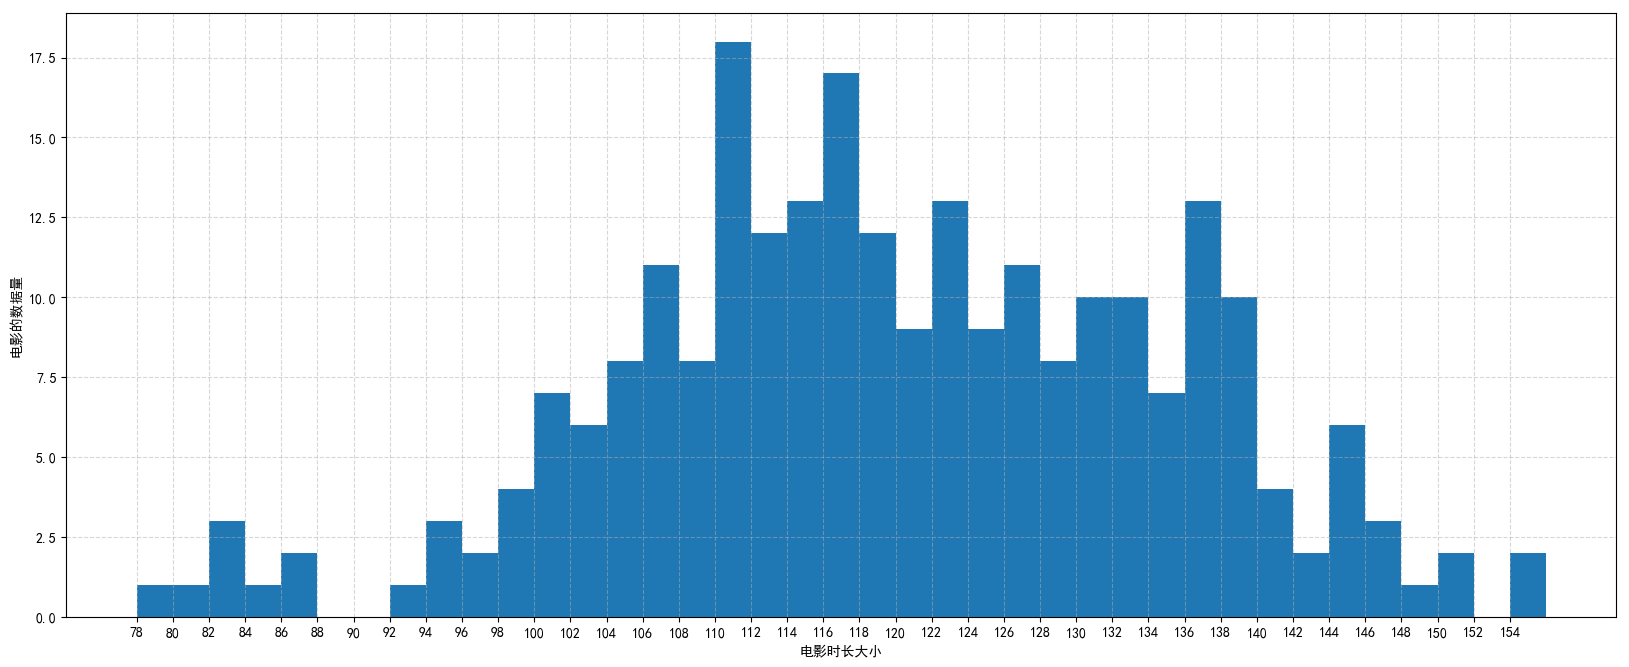

In [44]:
# 1）准备数据
time = [131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114, 119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128, 115,  99, 136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,  86,  95, 144, 105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,  99, 136,123, 117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107, 129, 116, 108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125, 138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,107, 143, 115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 106, 123, 116, 131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 111, 110, 111, 100, 154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 141,120, 117, 106, 149, 122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 130, 141, 117, 106, 114, 121, 114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 117, 112,  81,  97, 139, 113,134, 106, 144, 110, 137, 137, 111, 104, 117, 100, 111, 101, 110,105, 129, 137, 112, 120, 113, 133, 112,  83,  94, 146, 133, 101,131, 116, 111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]

# 2）创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 3）绘制直方图
distance = 2  # 设置组距
group_num = int((max(time) - min(time)) / distance)  # 计算组数  通常设置组数会有相应公式：组数 = 极差/组距= (max-min)/bins
plt.hist(time, bins=group_num)  # 绘制直方图

# 修改x轴刻度显示
plt.xticks(range(min(time), max(time))[::2])

# 添加网格显示
plt.grid(linestyle="--", alpha=0.5)

# 添加x, y轴描述信息
plt.xlabel("电影时长大小")
plt.ylabel("电影的数据量")

# 4）显示图像
plt.show()

## 饼图
    plt.pie(x, labels=,autopct=,colors)
        x:数量，自动算百分比
        labels:每部分名称
        autopct:占比显示指定%1.2f%%
        colors:每部分颜色
    需求：显示不同的电影的排片占比
    

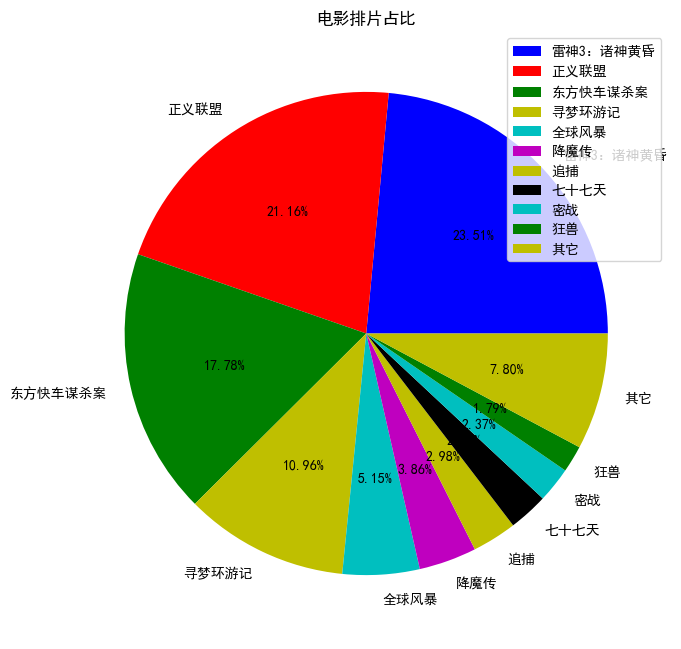

In [45]:
# 1）准备数据
movie_name = ['雷神3：诸神黄昏','正义联盟','东方快车谋杀案','寻梦环游记','全球风暴','降魔传','追捕','七十七天','密战','狂兽','其它']

place_count = [60605,54546,45819,28243,13270,9945,7679,6799,6101,4621,20105]

# 2）创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 3）绘制饼图
plt.pie(place_count, labels=movie_name, autopct="%1.2f%%", colors=['b','r','g','y','c','m','y','k','c','g','y'])

# 显示图例
plt.legend()

# 添加标题
plt.title("电影排片占比")

# 4）显示图像
plt.show()

为了让显示的饼图保持圆形，需要添加axis保证长宽一样

plt.axis('equal')